# **Reto Limpieza del Conjunto de Datos**

# Integrantes:

**Gerardo Peña Pérez**

**Carlos Alberto Hurtado Sánchez**

**Kevin Joan Delgado Pérez A01706328**

**Wenguang Hu**


**Fecha: 26/08/2022**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/dataset/store-sales-time-series-forecasting"
!ls  # show current directory

/content/gdrive/MyDrive/dataset/store-sales-time-series-forecasting
holidays_events.csv  sample_submission.csv  test.csv   transactions.csv
oil.csv		     stores.csv		    train.csv


In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_stores = pd.read_csv("stores.csv")  
df_transactions = pd.read_csv("transactions.csv").sort_values(["store_nbr", "date"])
df_oil = pd.read_csv("oil.csv")  
df_holiday = pd.read_csv("holidays_events.csv")  

In [ ]:
df_train["date"] = pd.to_datetime(df_train['date'])
df_test["date"] = pd.to_datetime(df_test['date'])
df_transactions["date"] = pd.to_datetime(df_transactions['date'])
df_oil["date"] = pd.to_datetime(df_oil['date'])

df_train['date'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: date, dtype: datetime64[ns]

# Primer Propuesta: Oil

Creímos que podría haber una relación entre el precio del petróleo y las ventas y transacciones de las tiendas, debido a que Ecuador es un país dependiente del petróleo

In [ ]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
average_price = df_oil.groupby('date')['dcoilwtico'].mean()
average_price.head()

date
2013-01-01      NaN
2013-01-02    93.14
2013-01-03    92.97
2013-01-04    93.12
2013-01-07    93.20
Name: dcoilwtico, dtype: float64

In [ ]:
avg_price = average_price.copy()

Veamos cómo se mueve el precio promedio del petróleo en el tiempo 

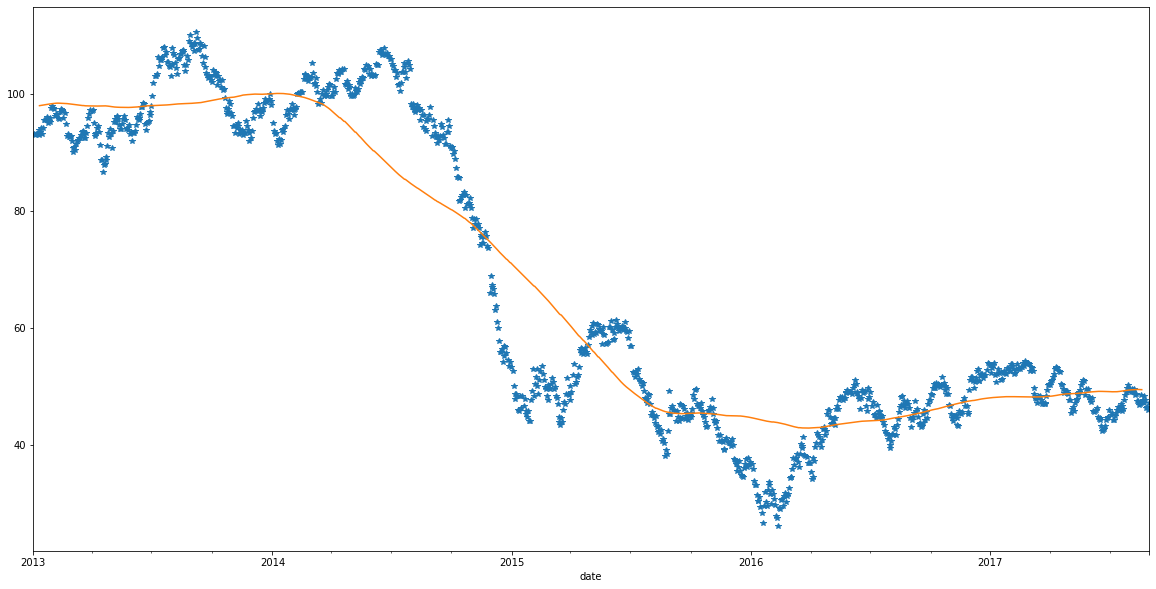

In [ ]:
moving_average3 = avg_price.rolling(window=365, center=True, min_periods=183).mean()
avg_price.plot(style='*',figsize=(20,10))
moving_average3.plot()

In [ ]:
df_transactions["date"] = pd.to_datetime(df_transactions['date'])
df_transactions

,date,store_nbr,transactions
1,2013-01-02,1,2111
47,2013-01-03,1,1833
93,2013-01-04,1,1863
139,2013-01-05,1,1509
185,2013-01-06,1,520
...,...,...,...
83271,2017-08-11,54,768
83325,2017-08-12,54,903
83379,2017-08-13,54,1054
83433,2017-08-14,54,818


In [ ]:
df_aux_merged_oil = pd.merge(df_transactions, df_oil, how='left')
df_aux_merged_oil = pd.merge(df_aux_merged_oil, df_train, how = 'left')

Buscamos correlaciones pearson y spearman entre el precio del petróleo y las transacciones. Obteniendo 0.0218 y 0.0376 respectivamente, lo cual nos dice que no hay relación considerablemente fuerte

In [ ]:
pearson_corr = df_aux_merged_oil.corr('pearson')['dcoilwtico'].loc['transactions']
spearman_corr = df_aux_merged_oil.corr('spearman')['dcoilwtico'].loc['transactions']

In [ ]:
df_aux_merged_oil.columns

Index(['date', 'store_nbr', 'transactions', 'dcoilwtico', 'id', 'family',
       'sales', 'onpromotion'],
      dtype='object')

In [ ]:
print(f'pearson_corr = {pearson_corr:.4f} and spearman corr = {spearman_corr:.4f}')

pearson_corr = 0.0218 and spearman corr = 0.0376


Después consideramos interesante graficar ambos, tanto la relación  Transacciones--precio y Ventas--Precio

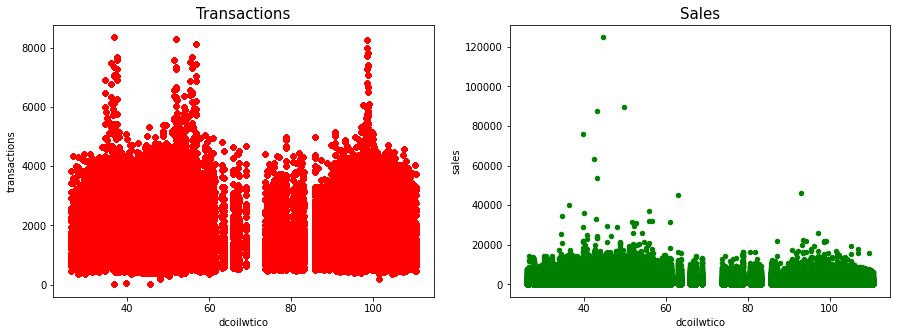

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
df_aux_merged_oil.plot.scatter(x = "dcoilwtico", y = "transactions", ax=axes[0], color='r')
df_aux_merged_oil.plot.scatter(x = "dcoilwtico", y = "sales", ax=axes[1], color = "g")
axes[0].set_title('Transactions', fontsize = 15)
axes[1].set_title('Sales', fontsize = 15);

Confirmamos visualmente que no existe una relación fuerte entre estas variables. A pesar que, en ocasiones, sucede lo que esperabamos (precios de petróleo bajo, altas ventas, porque tal vez la gente tiene más efectivo para gastar)

Ahora veremos como se comportan las ventas de cada familia sobre el tiempo. Aqui nos damos cuenta de que la familia de productos más vendida es la de "Grocery 1"

In [ ]:
a = df_train.set_index("date").groupby("family").resample("D").sales.sum().reset_index()
px.line(a, x = "date", y= "sales", color = "family", title = "Daily total sales of the family")

# Segunda Propuesta: Eventos vacacionales y tiendas Nacionales vs Locales

Se decidió generar otra propuesta de análisis donde se involucraba el archivo "holiday_events.csv".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/IA_data_sets/Bloque1/Reto"
!ls  # show current directory

/content/drive/MyDrive/IA_data_sets/Bloque1/Reto
holidays_events.csv  oil.csv  stores.csv  test.csv  train.csv  transactions.csv


In [ ]:
df_holiday = pd.read_csv('holidays_events.csv')
sns.set(rc={"figure.figsize": (20,10)})

Se desplegó la informacion de las variables para saber si existían datos faltantes, al tener una negativa, se procedió a conocer las variables que serían de utilidad para generar la propuesta.

In [ ]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


Dado que casi todas las columnas contienen datos no numéricos, es necesario generar un conteo de la informacion que se pretende abstraer de el Dataframe.

In [ ]:
df_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Se decidió analizar la variable 'Locale' a cause de revisar el tipo de tienda que existen en la informacion, de esta forma se podrían obtener algunas cuantas conclusiones que incluyen la centralización del país a zonas urbanas, o el impacto del comercio local existente en Ecuador.

In [ ]:
dfH_l = df_holiday[['locale']]

In [ ]:
dfH_l.value_counts(sort = True)

locale  
National    174
Local       152
Regional     24
dtype: int64

Encontrando estos datos, fue interesante notar que habia más tiendas locales que regionales, lo cual podían suponer varios factores, desde la dificultad para la expansión de tiendas locales, hasta la preferencia de las tiendas nacionales y más reconocidas por sobre aquellas que tampoco tenían el concepto de "consumir local".

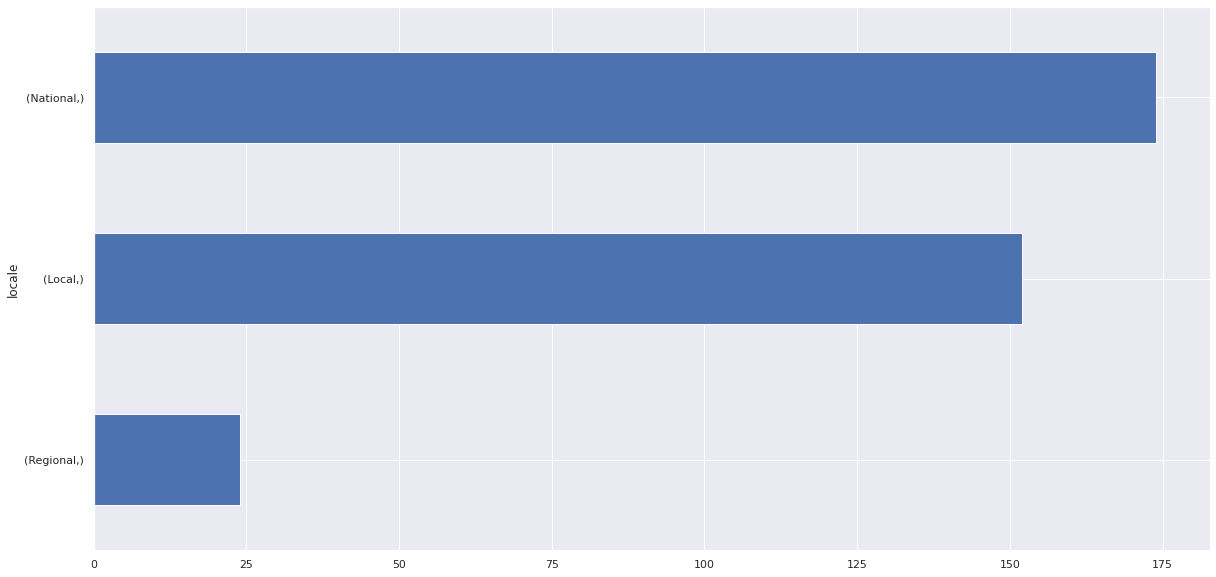

In [ ]:
dfH_l.value_counts().sort_values().plot(kind = 'barh')


Para comparar de una mejor manera la cantidad de los tipos de tiendas que existían se recurrió a una gráfica de pastel, lo cual llevó al equipo a reflexionar sobre tomar la decisión y contemplar a las tiendas regionales, al final, el equipo decidió "dropear" la información de las tiendas regionales, puesto que no generarían tanto impacto en comparación a las demás tiendas, en específico con la propuesta generada.

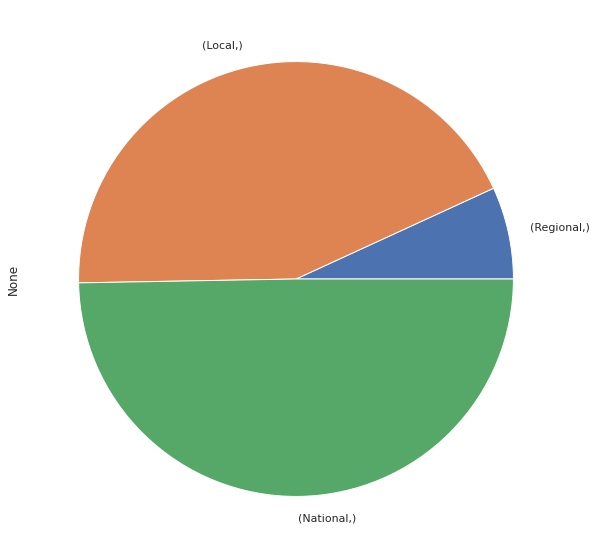

In [ ]:
dfH_l.value_counts().sort_values().plot(kind = 'pie')

In [ ]:
#indexRegShop = dfH_l[ dfH_l == 'Regional'].index
#indexRegShop

RangeIndex(start=0, stop=350, step=1)

In [ ]:
dfH_final = dfH_l

In [ ]:
dfH_final.drop(dfH_l[dfH_l['']])

In [ ]:
#dfH_final = dfH_l[dfH_l['locale'] != 'Regional']

In [ ]:
#dfH_final

,locale
0,Local
2,Local
3,Local
4,Local
5,Local
...,...
345,National
346,National
347,National
348,National


Finalmente, la propuesta fue generada y consistió en, **de qué manera afecta la centralización, comparando la gran cantidad de tiendas nacionales y más reconocidas con las tiendas locales, y esto aunado a la información de la cantidad de tiendas que se encuentran por cada ciudad/estado**.

In [ ]:
dfH_ty = df_holiday[['type']]

In [ ]:
dfH_ty.value_counts(sort = True)

type      
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
dtype: int64

Por otro lado, para un mayor control de excepciones, se decidió analizar la variable 'type' para obtener información sobre el día de vacaciones y el tipo de celebración que fue en ese día, de esa manera, si existen "outlyers" o datos fuera del rango normal, es posible entender el contexto en base al acontecimiento de acuerdo a la fecha.

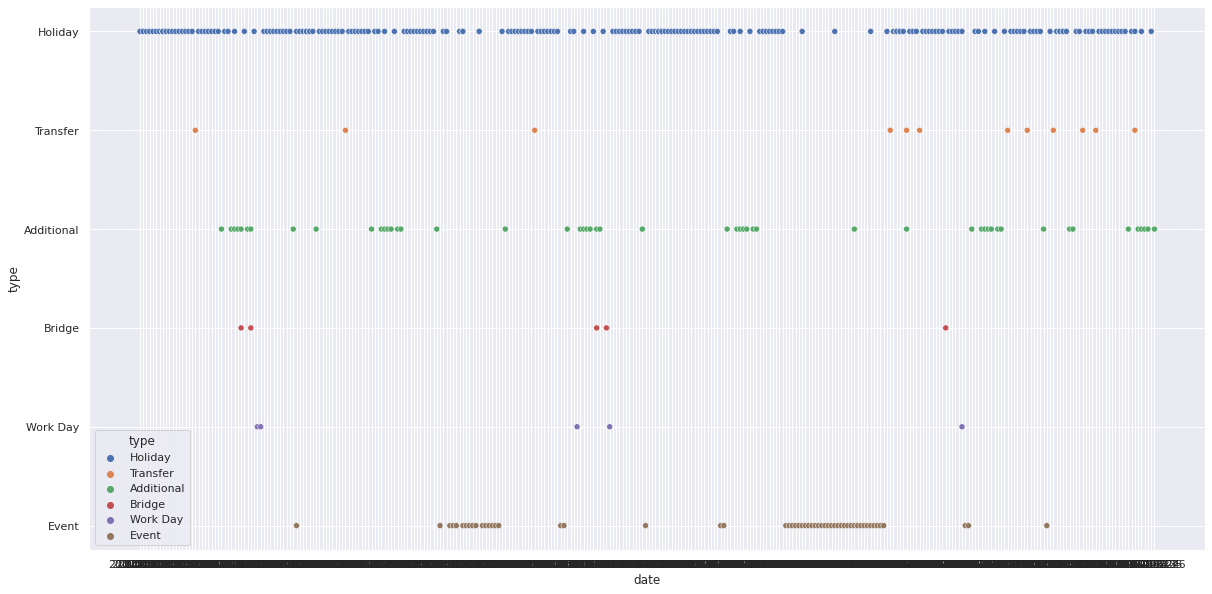

In [ ]:
sns.scatterplot(x='date', y ='type' ,data = df_holiday, hue = 'type')

Conocer el nombre de la tienda también podría añadir mayor informacion sobre "outlyers" e incluso la posibilidad de encontrar factores más especificos, desde el tipo de productos que vende, hasta la propia ubicación de la misma para apoyar conclusiones sobre la popularidad y sus ventas.

In [ ]:
dfH_ln = df_holiday[['locale_name']]
dfH_ln.value_counts(sort = True)

locale_name                   
Ecuador                           174
Quito                              13
Ambato                             12
Guaranda                           12
Riobamba                           12
Latacunga                          12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Manta                               6
Santo Domingo                       6
Santa Elena                         6
Salinas                             6
Quevedo                             6
Puyo                                6
Libertad                            6
Machala                             6
Loja                                6
Cayambe                             6
Imbabura                            6
Esmeraldas                          6
El Carmen                           6
Cotopaxi                            6
Santo Domingo de los Tsachilas      6
dtype: int64

Finalmente la comparativa de la cantidad de tiendas que existían por nombre fue abismal, comparandose con la primera mostrada en la gráfica de a continuación (Ecuador), con esta información adicional será posible generar mejores conclusiones en cuanto a excepciones que se encuentren en otros datasets.

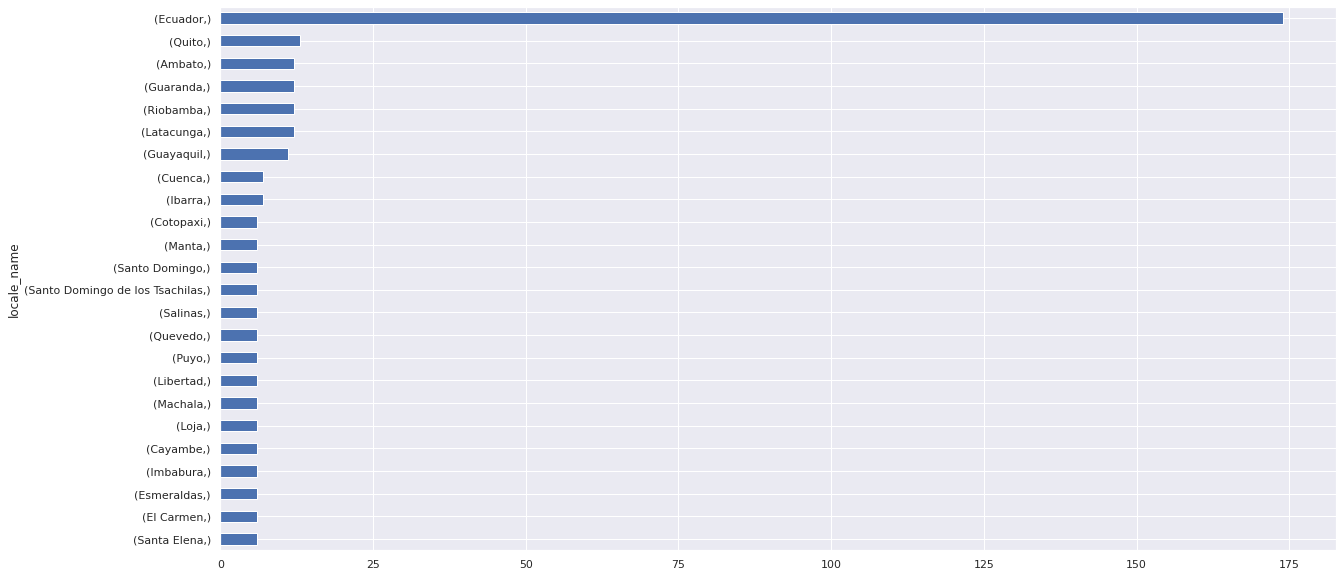

In [ ]:
dfH_ln.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
data_dir = ""
data_files = [
    "holidays_events.csv", 
    "oil.csv", 
    "sample_submission.csv", 
    "stores.csv", 
    "test.csv", 
    "train.csv", 
    "transactions.csv"
]

In [ ]:
df = {
    data_file.split(".")[0]: pd.read_csv(data_dir + data_file)
    for data_file in data_files
}
df.keys()

dict_keys(['holidays_events', 'oil', 'sample_submission', 'stores', 'test', 'train', 'transactions'])

## `stores` dataset

In [ ]:
df_stores = df["stores"]

## `transactions` dataset

## Transactions and oil

In [ ]:
df["oil"].describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [ ]:
df["oil"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
df["transactions"].describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [ ]:
df["transactions"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


## Raw

In [ ]:
oil_and_transactions = pd.merge(df["oil"], df["transactions"])
oil_and_transactions

,date,dcoilwtico,store_nbr,transactions
0,2013-01-01,NaN,25,770
1,2013-01-02,93.14,1,2111
2,2013-01-02,93.14,2,2358
3,2013-01-02,93.14,3,3487
4,2013-01-02,93.14,4,1922
...,...,...,...,...
59646,2017-08-15,47.57,50,2804
59647,2017-08-15,47.57,51,1573
59648,2017-08-15,47.57,52,2255
59649,2017-08-15,47.57,53,932


In [ ]:
# Drop NA values
oil_and_transactions = oil_and_transactions.loc[oil_and_transactions["dcoilwtico"].notna()]
oil_and_transactions

,date,dcoilwtico,store_nbr,transactions
1,2013-01-02,93.14,1,2111
2,2013-01-02,93.14,2,2358
3,2013-01-02,93.14,3,3487
4,2013-01-02,93.14,4,1922
5,2013-01-02,93.14,5,1903
...,...,...,...,...
59646,2017-08-15,47.57,50,2804
59647,2017-08-15,47.57,51,1573
59648,2017-08-15,47.57,52,2255
59649,2017-08-15,47.57,53,932


In [ ]:
%matplotlib inline
sns.set(rc={"figure.figsize": (20,10)})

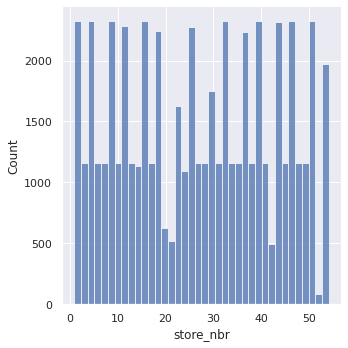

In [ ]:
sns.displot(oil_and_transactions["store_nbr"])

In [ ]:
transactions = df["transactions"].drop(["date"], axis=1)
transactions.head()  # 6955015380

,store_nbr,transactions
0,25,770
1,1,2111
2,2,2358
3,3,3487
4,4,1922


In [ ]:
df["stores"].head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores_and_transactions = pd.merge(df["stores"], transactions)
stores_and_transactions.head()

,store_nbr,city,state,type,cluster,transactions
0,1,Quito,Pichincha,D,13,2111
1,1,Quito,Pichincha,D,13,1833
2,1,Quito,Pichincha,D,13,1863
3,1,Quito,Pichincha,D,13,1509
4,1,Quito,Pichincha,D,13,520


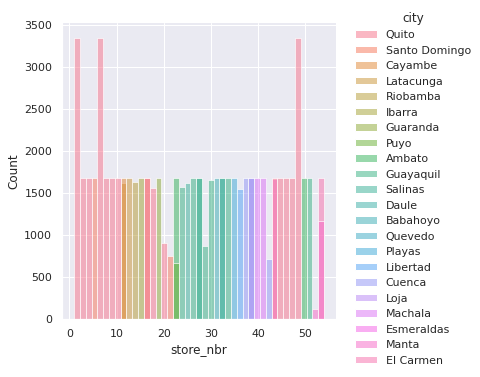

In [ ]:
sns.displot(x="store_nbr", hue=stores_and_transactions["city"], data=stores_and_transactions)

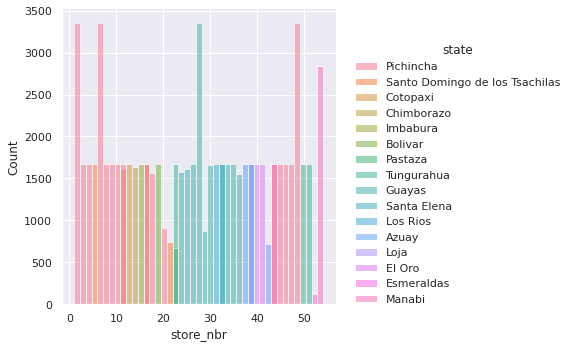

In [ ]:
sns.displot(x="store_nbr", hue=stores_and_transactions["state"], data=stores_and_transactions)

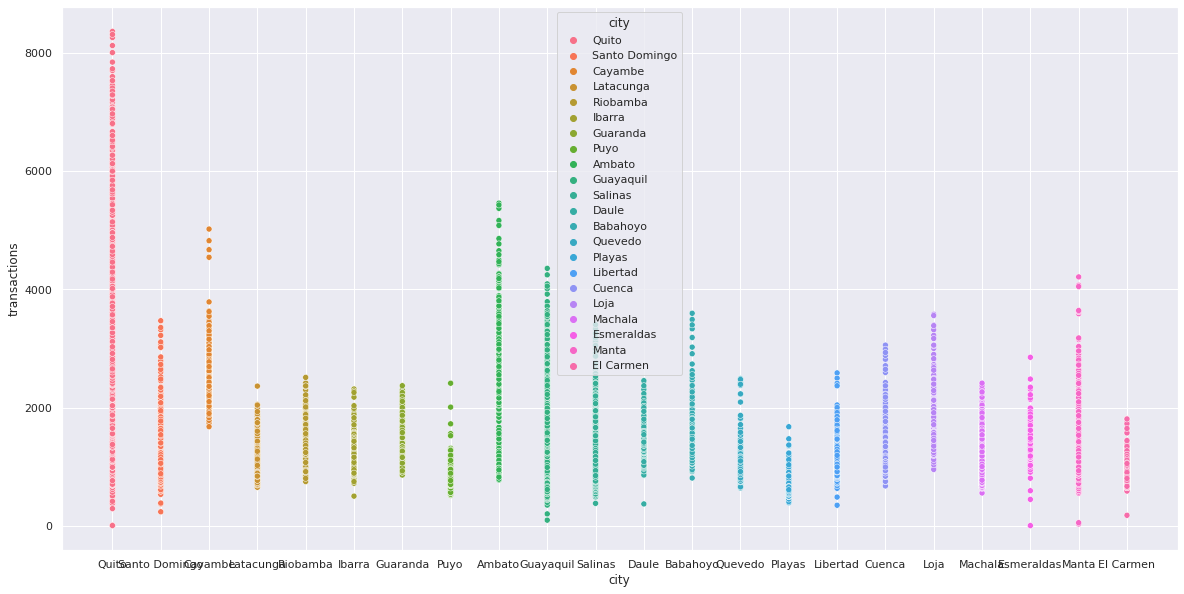

In [ ]:
sns.scatterplot(x="city", y="transactions", data=stores_and_transactions, hue="city")

In [ ]:
df = stores_and_transactions.groupby(by=["city"]).sum()
df.head()

,store_nbr,cluster,transactions
city,,,
Ambato,122421,38571,6172615
Babahoyo,52018,16780,2306044
Cayambe,18436,10056,3972488
Cuenca,157768,14864,5673847
Daule,45279,1677,2485687


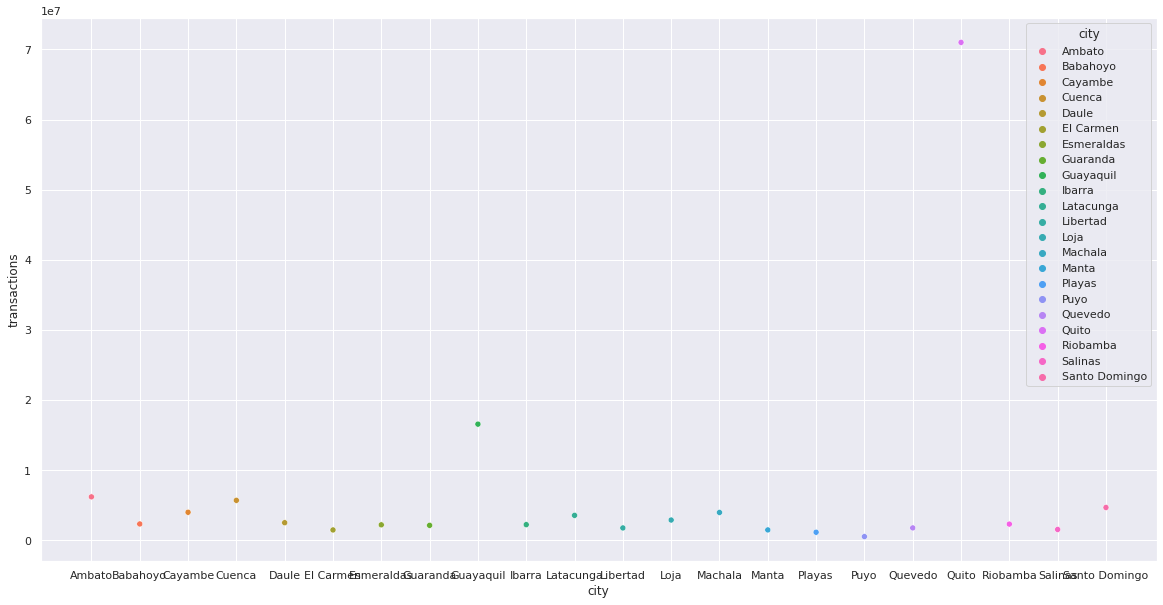

In [ ]:
sns.scatterplot(x="city", y="transactions", data=df, hue="city")

In [ ]:
df = stores_and_transactions.groupby(by=["city"]).mean()
df.head()

,store_nbr,cluster,transactions
city,,,
Ambato,36.500000,11.500000,1840.374180
Babahoyo,31.000000,10.000000,1374.281287
Cayambe,11.000000,6.000000,2370.219570
Cuenca,38.706575,3.646712,1392.013494
Daule,27.000000,1.000000,1482.222421


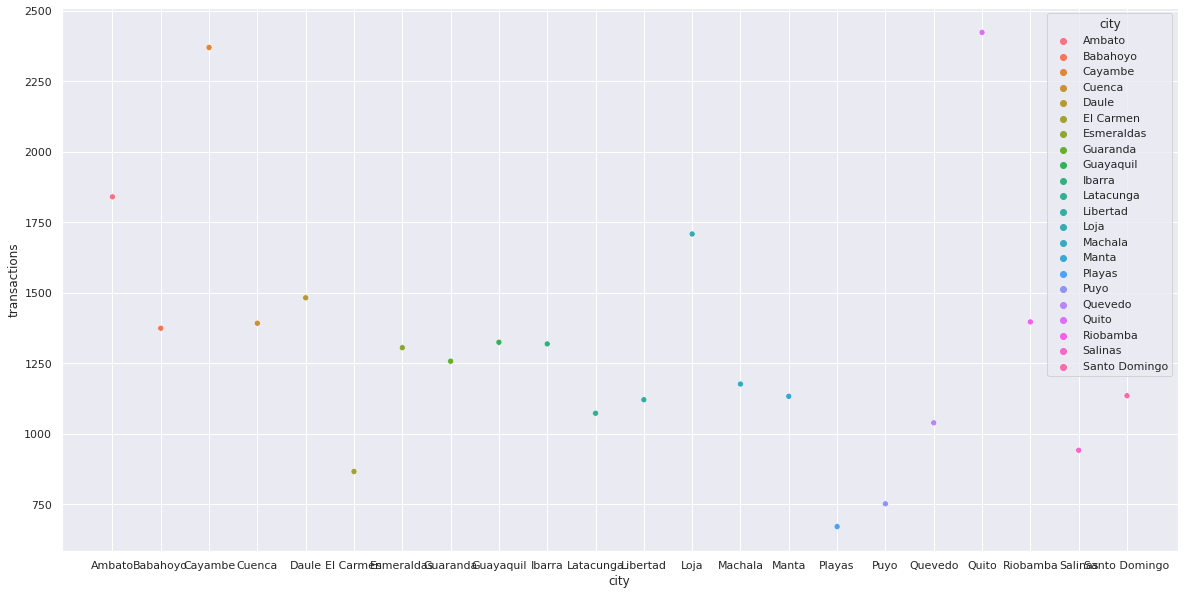

In [ ]:
sns.scatterplot(x="city", y="transactions", data=df, hue="city")

In [ ]:
df = stores_and_transactions.groupby(by=["state"]).sum()
df.head()

,store_nbr,cluster,transactions
state,,,
Azuay,157768,14864,5673847
Bolivar,31844,25140,2107489
Chimborazo,22932,11466,2287850
Cotopaxi,41180,49380,3531356
El Oro,135837,11739,3945341


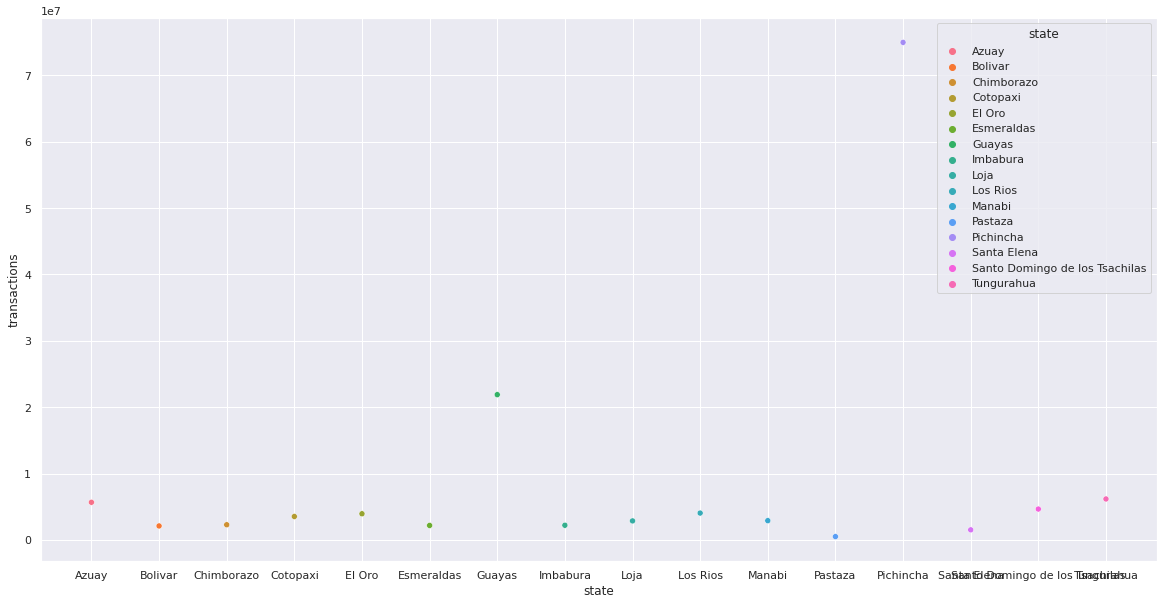

In [ ]:
sns.scatterplot(x="state", y="transactions", data=df, hue="state")

In [ ]:
df = stores_and_transactions.groupby(by=["state"]).mean()
df.head()

,store_nbr,cluster,transactions
state,,,
Azuay,38.706575,3.646712,1392.013494
Bolivar,19.000000,15.000000,1257.451671
Chimborazo,14.000000,7.000000,1396.733822
Cotopaxi,12.509113,15.000000,1072.708384
El Oro,40.500000,3.500000,1176.309183


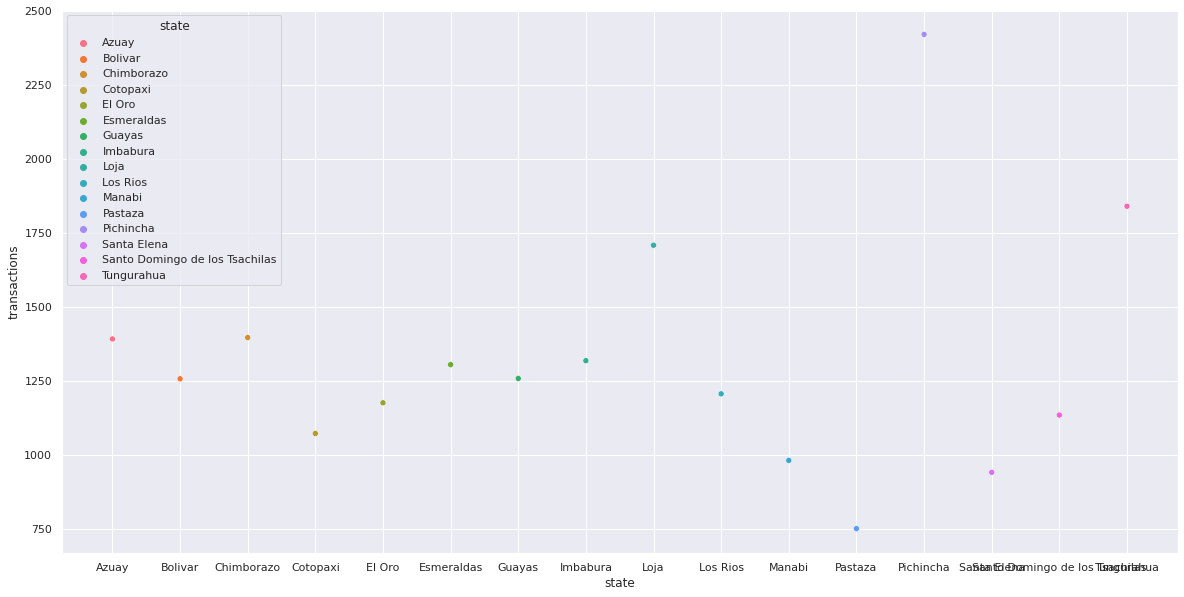

In [ ]:
sns.scatterplot(x="state", y="transactions", data=df, hue="state")